# ✅ Proyecto Final

### Análisis de Datos de Emprendedores en la Provincia de Entre Ríos (2016-2019)

### CoderHouse: Data Science III - NLP & Deep Learning aplicado a Ciencia de Datos

### Rodrigo Sosa - Cohorte 2024/2025

**LinkedIn**: [https://www.linkedin.com/in/sosarodrigo/](https://www.linkedin.com/in/sosarodrigo/)

![Portada](https://github.com/sosarodrigox/coderhouse_emprendedores_it/blob/main/DataBanner2.png?raw=1)

📚 **Introducción**

El dataset utilizado en este análisis proviene de un archivo de Google Sheets asociado al formulario de Google desarrollado para la **Línea de Acción "Incorporación de Tecnología"**, un programa implementado por el Ministerio de Desarrollo Social de Entre Ríos entre marzo de 2016 y agosto de 2019. Este formulario recopiló información clave de emprendedores interesados en recibir apoyo financiero para la adquisición de herramientas y equipamiento.

✨ **Proyectos Previos**
En la etapa Data Science II de la Carrera de Ciencia de Datos, realicé dos proyectos relacionados:

1. **EDA y Data Wrangling**:
[EDA y Data Wrangling Notebook](./DataWrangling_EDA_SosaRodrigo(Corregido).ipynb)
   - Objetivo: Explorar y limpiar los datos para identificar patrones relacionados con las aprobaciones.
   - Principales hallazgos: Factores como dedicación semanal, sector productivo y participación en programas de apoyo estaban fuertemente correlacionados con las aprobaciones.

2. **Machine Learning**: 
[Machine Learning Notebook](./MachineLearning_SosaRodrigo.ipynb)
   - Objetivo: Desarrollar un modelo predictivo para predecir la aprobación de proyectos.
   - Principal desafío: Un desbalance significativo en las clases (1,174 aprobados vs. 75 no aprobados), lo que dificultó la correcta identificación de los casos no aprobados.
   - Resultados: Aunque se aplicaron técnicas como SMOTE y modelos avanzados como XGBoost, el desbalanceo de datos limitó la capacidad predictiva del modelo para identificar proyectos no aprobados.

<p align="center">
   <img src="img/aprobados.png" alt="Distribución de aprobados y no aprobados">
</p>

★ **Enfoque del Proyecto Actual**

En este proyecto, se propone explorar un enfoque basado en **Procesamiento de Lenguaje Natural (NLP)**, utilizando las observaciones y conclusiones registradas por el equipo técnico en la columna *"Evaluación Final"*. Este texto contiene descripciones detalladas que podrían influir en el resultado de aprobación o desaprobación de los emprendedores.

✨ **Objetivo Principal**
Desarrollar un modelo predictivo que clasifique los proyectos como "aprobados" o "no aprobados" a partir del análisis de texto en las evaluaciones. Esto se logrará mediante técnicas de NLP para procesar y vectorizar el texto, combinado con algoritmos de clasificación supervisada.

✨ **Estrategia Metodológica**

1. **Preprocesamiento del Texto:**
   - Tokenización, lematización y remoción de *stopwords*.
   - Análisis de frecuencia y creación de representaciones vectoriales (TF-IDF).

2. **Análisis de Sentimientos:**
   - Evaluar la polaridad y el sentimiento general del texto como una característica adicional.

3. **Modelo Predictivo:**
   - Entrenar un modelo supervisado basado en las representaciones vectoriales del texto y evaluar su desempeño con métricas clave como Recall, F1-score y AUC-ROC.

✨ **Relevancia**
Este análisis tiene como objetivo aportar una nueva perspectiva al proceso de selección de proyectos, integrando herramientas de NLP para comprender mejor el impacto del lenguaje utilizado en las evaluaciones técnicas. Además, busca superar las limitaciones de los modelos de Machine Learning tradicionales al incorporar información contextual valiosa directamente desde los datos textuales.

Como **Técnico en Gestión y Administración Pública (UNER)** y **Técnico en Ciencia de Datos (ISPC)**, mi interés radica en aplicar técnicas avanzadas de ciencia de datos para mejorar la eficiencia de las políticas públicas. Este proyecto representa una oportunidad para explorar nuevos enfoques en la toma de decisiones, optimizando los recursos disponibles y apoyando el desarrollo de los emprendedores locales. 📊

### **Plan de Trabajo:**

1️⃣ **Exploración y Selección de Datos**  
   - 🔍 Filtrar las columnas relevantes, manejar los duplicados y ajustar las etiquetas.  

2️⃣ **Preprocesamiento del Texto**  
   - ✂️ Realizar **tokenización**, **lemmatización** y **remoción de stopwords**.  
   - 📊 Convertir el texto a representaciones numéricas con **TF-IDF**.

3️⃣ **Análisis de Sentimientos**  
   - 🌡️ Evaluar la polaridad de los textos como una característica adicional.  

4️⃣ **Entrenamiento del Modelo Predictivo**  
   - 🧪 Dividir los datos en conjuntos de entrenamiento y prueba.  
   - 🤖 Entrenar un modelo supervisado (como Random Forest o Logistic Regression).  

5️⃣ **Evaluación y Visualización de Resultados**  
   - 📈 Evaluar métricas clave (Precision, Recall, F1-Score, AUC-ROC).  
   - 🎨 Crear visualizaciones para mostrar los insights y el desempeño del modelo.

In [72]:
# Importar librerías necesarias
import pandas as pd
import missingno as msno
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [73]:
# Ruta del archivo Excel en GitHub
url = "https://github.com/sosarodrigox/coderhouse_emprendedores_it/raw/main/emprendedores%20_it.xlsx"

df = pd.read_excel(url)

# Configuración para mostrar todas las columnas
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)

df.head(2)

,Marca temporal,Marcar entrevista como:,Fecha de la entrevista:,Fecha de la entrevista-Final:,Equipo Técnico:,Referencia a Expediente:,Localidad:,Departamento:,Fecha de Nacimiento-Final:,Sexo:,Estado Civil:,Nivel de Estudio Actual:,Situación Laboral PRINCIPAL:,Situación Habitacional:,Tipo de vivienda:,Situación Familiar:,Situación ante el IVA:,Observaciones Respecto al IVA:,Tramitó la Exención Impositiva en ATER?:,Ingreso MENSUAL de su Economía Familiar:,Nombre del emprendimiento:,Facebook del emprendimiento:,E-mail (Del Emprendimiento):,Descripción del Emprendimiento:,Antigüedad del Emprendimiento (Años):,Antigüedad del Emprendimiento (Meses):,Tiempo que dedica al emprendimiento (Días a la semana):,Tiempo que dedica al emprendimiento (Horas por día):,Realizó algún tipo de capacitación previa para su emprendimiento:,"En caso de haber recibido algún tipo de capacitación, marque cuales:",Cantidad de personas involucradas en el emprendimiento:,Qué función cumplen?:,Cómo realiza sus ventas? / Cómo ofrece sus servicios?:,Utiliza tarjeta de crédito para realizar sus ventas?:,Cantidad de clientes:,Facturación Mensual (Ingresos Brutos):,Costo Mensual (Egresos):,Ganancia Mensual-Final:,Detallar el nivel de producción semanal:,Donde compra la materia prima?:,El emprendimiento se desarrolla en un ámbito:,Donde realiza su producción? / Donde ofrece su servicio?:,Condiciones del espacio físico donde desarrolla el emprendimiento:,Observaciones del espacio productivo:,Qué habilitaciones posee su espacio productivo?:,Servicio Eléctrico:,Servicio de Gas:,Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:,En qué invirtió o para qué utilizó el fortalecimiento adquirido?:,Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:,Equipamiento con el que cuenta:,Herramientas o equipamiento que solicita:,Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as:,Devolución con respecto a la gestión de la herramienta o equipamiento:,Evaluación Final:,Herramienta/as aprobada/as por Equipo Técnico:,Monto Máximo ($) aprobado por Equipo Técnico:,Herramienta comprada Efectivamente:,Observaciones de la entrevista:,Rubro:,Sub-Rubro:,Sub-Rubro:.1,Sub-Rubro-Final:,Actividad:,Actividad:.1,Actividad:.2,Actividad:.3,Actividad:.4,Actividad:.5,Actividad:.6,Actividad:.7,Actividad:.8,Actividad:.9,Actividad:.10,Actividad:.11,Actividad:.12,Actividad:.13,Actividad:.14,Actividad:.15,Actividad-Final:
0,2016-03-18 09:27:31,La entrevista se realizó correctamente.,2016-03-17 00:00:00,2016-03-17 00:00:00,Gisela,NaN,Gualeguaychú,Gualeguaychú,1971-02-09 00:00:00,Femenino,Casada/o,Secundario Completo,Autoempleado,Vivienda Alquilada,TIPO B,Vive con su esposo quien realiza changas de jardinería y comparte el emprendimiento. Tienen dos hijas de 3 y 9 años,Monotributo Social,NaN,SI,6000.0,Lo Nuestro,Lo Nuestro,NaN,"Pre pizzas, pasta frolas, cremonas, pan saborizado, pizzetas, tartas frutales y de coco, tortas de cumpleaños",12.0,1.0,5.0,4.0,SI,Capacitación en el Oficio,1,"Los dos hacen todo, Brenda hace lo de reposteria sola","Tiene un puesto fijo en una Feria., Coordina las ventas con sus clientes a través de Redes Sociales (Ej. Facebook, Google+, Etc.), Comercios",NO,15,4000.0,2500.0,NaN,10 a 30 kg de harina,mayoristas locales,Urbano,En su casa. (No posee un espacio destinado al emprendimiento),Regular.,"Muy chico. 3 x 5 m. Techo cieloraso, piso ceramica",Ninguna,Instalación Monofásica.,Gas Envasado.,"Programa de Microcréditos para el Desarrollo de la Economía Social, Monotributo Social",Insumos- Elementos de Cocina,No,"Horno 6 moldes pizzero, Heladera familiar, batidora familiar y procesadora",Amasadora y sobadora de mesa,Para agregar otros productos con hojaldre y agilizar la producción,Aprobado,"Se considera necesario otorgar la maquinaria solicitada a la Sra. Reynoso ya que trabaja junto a su esposo, y no tiene otro ingreso económico por su cuenta y lo que aporta el S

### 1️⃣ **Exploración y Selección de Datos**  

Para iniciar el análisis, primero seleccionaremos las dos columnas relevantes: **"Evaluación Final"** y **"Devolución con respecto a la gestión de la herramienta o equipamiento"**. A continuación, se realizarán los siguientes pasos:

- 🌟 **Renombrar columnas:** Se asignarán nombres más descriptivos: *"Evaluacion"* y *"Etiqueta"*.  
- 🧹 **Eliminar valores nulos:** Filtraremos filas que contengan datos faltantes.  
- 🗂️ **Filtrar valores de la etiqueta:** Se eliminarán categorías poco frecuentes como *"No se pudo realizar la entrevista"* o *"El emprendedor rechazó el fortalecimiento"*, dejando únicamente *"Aprobado"* y *"No aprobado"*.  

Estas tareas son esenciales para garantizar que los datos sean consistentes y útiles para el análisis posterior. 🚀

,Evaluacion,Etiqueta
0,"Se considera necesario otorgar la maquinaria solicitada a la Sra. Reynoso ya que trabaja junto a su esposo, y no tiene otro ingreso económico por su cuenta y lo que aporta el Sr. Fabián no es mayor a lo del emprendimiento. \nLa condición de vulnerabilidad está dada por la imposibilidad de acceder a lo solicitado por sus propios medios sin comprometer la economía y bienestar de la familia. \nEl emprendimiento se destaca por la cantidad de producción realizada a diario como el tiempo que le dedican. La calidad de los productos que ofrecen es muy buena, priorizando la elección de materia prima de primera calidad. \nBuena presentación final de cada producto.",Aprobado
1,"Como equipo técnico consideramos relevante aportar subsidio para la compra de la herramienta que el Sr. Claudio Anghilante nos solicita, ya que la misma le permitirá ofrecer un nuevo servicio lo que impactará directamente en los ingresos del emprendedor. \nA su vez, el emprendimiento representa un ingreso esencial para el desarrollo de su familia, y considerando que el emprendedor se encuentra en la imposibilidad económica de adquirir la herramienta por sus propios medios sin afectar su calidad de vida, lo que coloca al emprendedor en una condición de vulnerabilidad social, evaluamos como positiva la gestión de la herramienta.",Aprobado
2,"Se considera necesario otorgar las herramientas solicitadas a fin de que la emprendedora pueda mejorar su emprendimiento y en consecuencia sus ganancias.\nEl emprendimiento es el principal ingreso para la familia y su desarrollo es muy interesante, participando en ferias de todo el país; los productos se destacan por su originalidad, buen gusto, excelente calidad y terminación. \nLa situación de vulnerabilidad de la emprendedora no puede adquirir las herramientas por sus propios medios sin comprometer su economía familiar.",Aprobado
3,"Se considera necesario otorgar las maquinarias solicitadas por la emprendedora a fin de que el emprendimiento pueda mejorar la calidad, diversificar la producción, aumentar las ganancias y reducir el tiempo de trabajo empleado por la emprendedora. \nLos productos elaborados son muy aceptados por los clientes y de gran demanda. La Sra. Bonin ya tiene una base muy importante de clientes a los que provee de sus productos de forma semanal. \nEs de destacar la participación en el mercado popular de la ciudad, como también contar con el monotributo social y la obtención de microcréditos. \nLa situación de vulnerabilidad de la emprendedora está dada por la imposibilidad de obtener la maquinaria por sus propios medios sin comprometer la economía familiar.",Aprobado
4,"Teniendo en cuenta el nivel de producción la sobadora le permitirá acelerar los tiempos de producción, mejorar la calidad de los productos que ofrece, como así también mejorar la calidad de su salud, ya que dada su edad los kilos que debe amasar diariamente le generan dolores musculares y articulares.",Aprobado


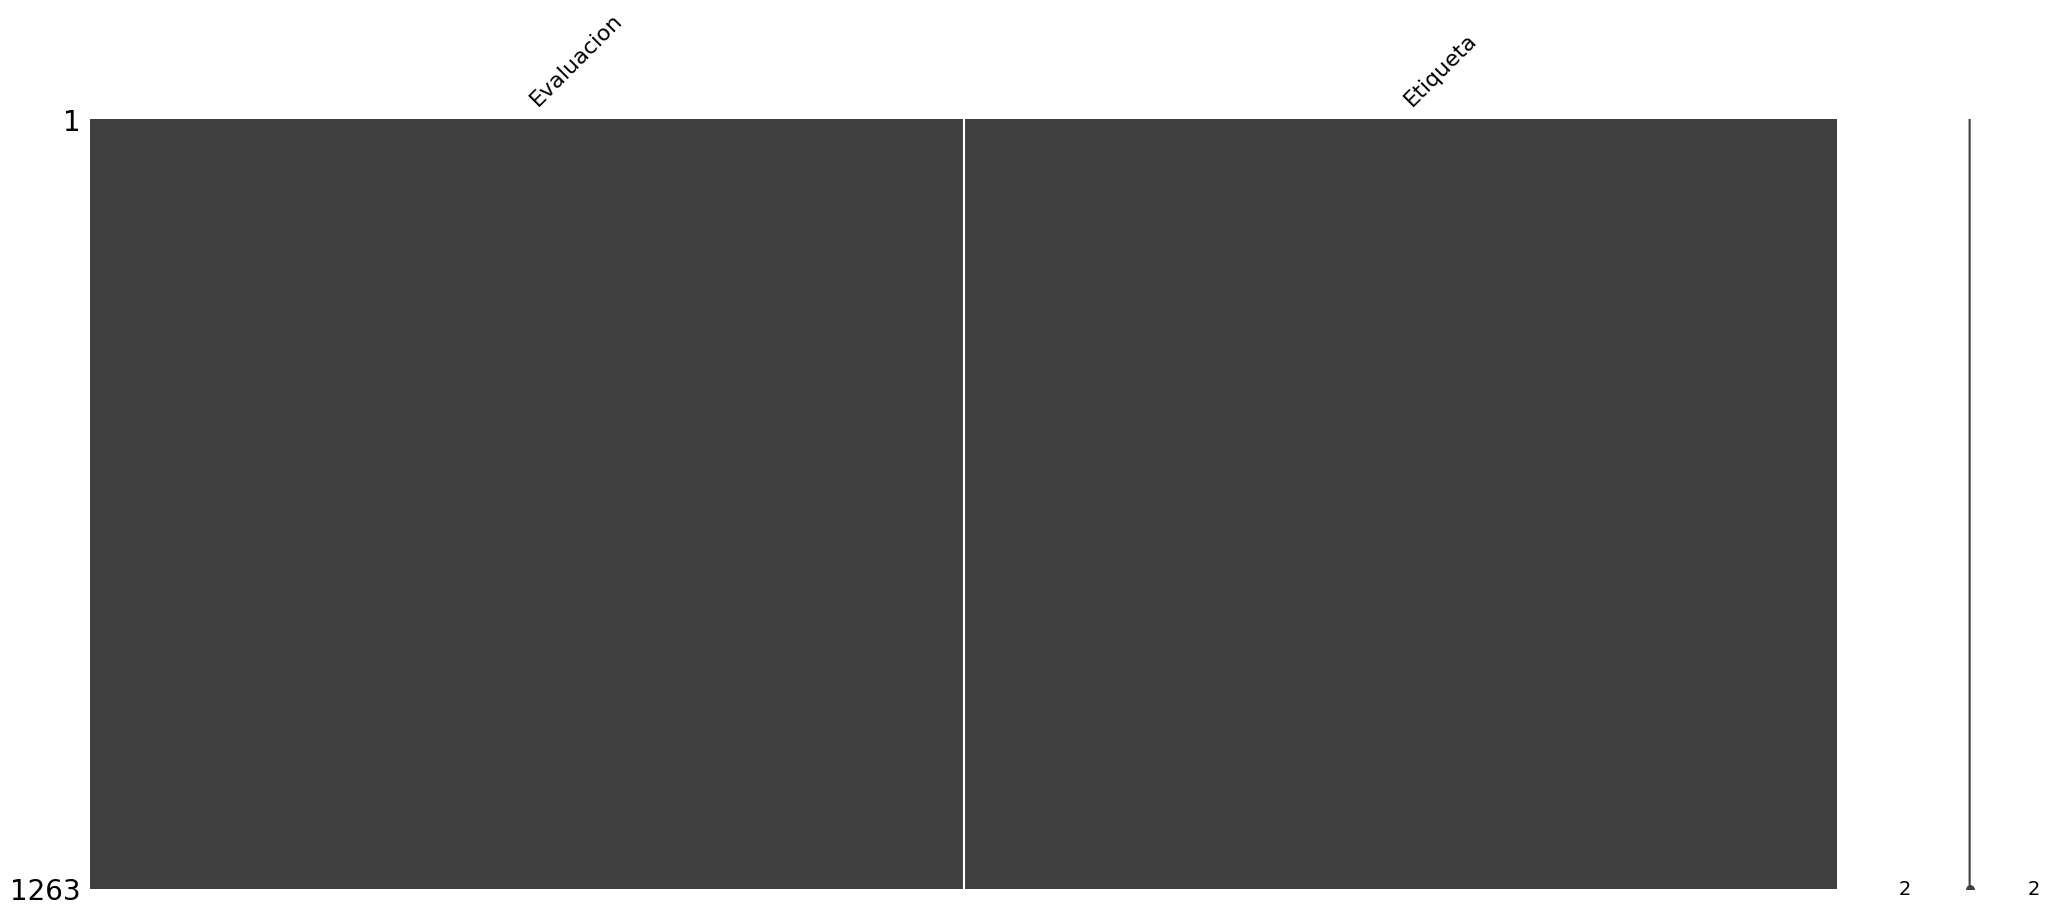

In [74]:
# Seleccionar las columnas relevantes
df_filtrado = df[
    [
        "Evaluación Final:",
        "Devolución con respecto a la gestión de la herramienta o equipamiento:",
    ]
]


df_filtrado = df_filtrado.rename(
    columns={
        "Evaluación Final:": "Evaluacion",
        "Devolución con respecto a la gestión de la herramienta o equipamiento:": "Etiqueta",
    }
)

# Utilizar la libreria missingno para visualizar los valores nulos

msno.matrix(df_filtrado)


# Eliminar filas con valores nulos
df_filtrado = df_filtrado.dropna(subset=["Evaluacion", "Etiqueta"])

# Filtrar valores de la columna "Etiqueta" para mantener solo "Aprobado" y "No aprobado"
valid_labels = ["Aprobado", "No aprobado"]
df_filtrado = df_filtrado[df_filtrado["Etiqueta"].isin(valid_labels)]

df_filtrado.head()

In [75]:
# Guardo el dataset en un archivo CSV
df_filtrado.to_csv("emprendedores_it_nlp.csv", index=False)

In [76]:
# A partir de aquí, uso el archivo CSV para continuar con el análisis

# Ruta del archivo CSV (ajusta la ruta si el archivo no está en el directorio actual)
csv_file = "emprendedores_it_nlp.csv"

# Cargar el CSV en un DataFrame
csv_df = pd.read_csv(csv_file)

print(csv_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Evaluacion  1260 non-null   object
 1   Etiqueta    1260 non-null   object
dtypes: object(2)
memory usage: 19.8+ KB
None


In [77]:
# Contar las ocurrencias de cada categoría en la columna 'Etiqueta'
print(csv_df["Etiqueta"].value_counts())

Etiqueta
Aprobado       1175
No aprobado      85
Name: count, dtype: int64


In [78]:
# Descripción de los datos
print(csv_df.describe())

                                                                                                                                                                                                                                                                                                                                       Evaluacion  Etiqueta
count                                                                                                                                                                                                                                                                                                                                        1260      1260
unique                                                                                                                                                                                                                                                                                                          

### **Análisis de Textos Duplicados**

Al explorar el dataset, se identificaron **46 evaluaciones duplicadas** en la columna **`Evaluacion`**, lo que representa aproximadamente un **3.6% del total de registros (1260 evaluaciones)**. Este fenómeno ocurre cuando múltiples registros comparten el mismo texto en sus evaluaciones técnicas, lo cual podría ser producto de situaciones como:

- Emprendedores con características similares que recibieron evaluaciones idénticas por parte del equipo técnico.
- Respuestas genéricas utilizadas como plantillas por los evaluadores.
- Registros duplicados en el proceso de recopilación de datos.

#### **Impacto Potencial en el Análisis**
Los textos duplicados podrían influir en el análisis de las siguientes formas:
1. **Sesgo en el análisis de palabras clave:** Los textos repetidos podrían sobre-representar ciertas palabras o frases, afectando el cálculo de frecuencias y la importancia asignada a términos clave en técnicas como **TF-IDF**.
2. **Efecto en el balance de clases:** Si las evaluaciones duplicadas están concentradas en una de las clases (`Aprobado` o `No aprobado`), esto podría exacerbar el problema de desbalance de clases.
3. **Ruido en el modelo predictivo:** Los duplicados podrían reducir la capacidad del modelo de aprendizaje supervisado para identificar patrones únicos en los datos textuales.

#### **Estrategia para Mitigarlo**
Para abordar este problema, se propone:
1. **Eliminación de duplicados exactos:** Revisar los textos en la columna `Evaluacion` y eliminar aquellos que sean idénticos, manteniendo solo una copia de cada uno.
2. **Validación manual:** Si es posible, verificar con el equipo técnico si los duplicados representan un caso legítimo (por ejemplo, plantillas de evaluación) o errores en la recopilación de datos.

Antes de proceder con la limpieza de duplicados, se llevará a cabo un análisis exploratorio adicional para determinar la distribución de las clases (`Etiqueta`) en los textos duplicados. Esto ayudará a decidir si deben ser eliminados o ajustados en función de su impacto en el balance general del dataset.

In [79]:
# Identificar y analizar textos duplicados
duplicados = csv_df[csv_df.duplicated(subset=["Evaluacion"], keep=False)]

# Contar el total de textos duplicados y mostrar la distribución de la etiqueta asociada
total_duplicados = duplicados.shape[0]
distribucion_duplicados = duplicados["Etiqueta"].value_counts()

# Porcentaje de duplicados en el dataset
porcentaje_duplicados = (total_duplicados / csv_df.shape[0]) * 100

# Mostrar los resultados
{
    "total_duplicated": total_duplicados,
    "percentage_duplicated": porcentaje_duplicados,
    "duplicated_distribution": distribucion_duplicados.to_dict(),
}

{'total_duplicated': 54,
 'percentage_duplicated': 4.285714285714286,
 'duplicated_distribution': {'No aprobado': 34, 'Aprobado': 20}}

In [80]:
# Ajustar la opción de Pandas para mostrar textos completos
pd.set_option("display.max_colwidth", None)

# Mostrar la primera fila duplicada de la columna 'Evaluacion' para ver si tiene sentido:
duplicados[["Evaluacion"]].head(1)

,Evaluacion
43,"El emprendimiento es incipiente dado que tiene menos de 6 meses de antiguedad y genera ingresos escasos para sostener la actividad, se recomendó participar en el programa de microcréditos y se brindó información para la formación en costos y modelos de negocios. Se derivó la situación a referentes del municipio correspondiente."


✨ **Interpretación del Resultado:**  
El texto _"El emprendimiento es incipiente dado que tiene menos de 6 meses de antigüedad..."_ aparece tanto en registros **aprobados** (20 casos) como en registros **no aprobados** (34 casos).  

⚙️ Esto sugiere que el texto de evaluación no es el único criterio utilizado para tomar decisiones, lo cual es razonable si el equipo técnico tiene en cuenta otros factores adicionales no registrados en el texto.  

✅ Luego de consultar al equipo técnico y dado que este es un dataset de prueba, he decidido **no eliminar los duplicados** en este momento. Sin embargo, cambiaré la etiqueta de los casos **aprobados** a **no aprobados** para evitar el desbalance en el dataset. Esto se justifica porque el texto de evaluación refleja una opinión técnica que describe un emprendimiento incipiente, el cual **no debería ser aprobado**.  

🚀 Este ajuste permitirá que el análisis sea más consistente y alineado con las características evaluadas en los textos.

In [81]:
# Cambiar la etiqueta de "Aprobado" a "No aprobado" para el texto objetivo
texto_objetivo = "El emprendimiento es incipiente dado que tiene menos de 6 meses de antiguedad y genera ingresos escasos para sostener la actividad, se recomendó participar en el programa de microcréditos y se brindó información para la formación en costos y modelos de negocios. Se derivó la situación a referentes del municipio correspondiente."
csv_df.loc[
    (csv_df["Evaluacion"] == texto_objetivo) & (csv_df["Etiqueta"] == "Aprobado"),
    "Etiqueta",
] = "No aprobado"

duplicados_actualizados = csv_df[csv_df["Evaluacion"] == texto_objetivo]
print(duplicados_actualizados[["Evaluacion", "Etiqueta"]])

                                                                                                                                                                                                                                                                                                                                     Evaluacion     Etiqueta
43    El emprendimiento es incipiente dado que tiene menos de 6 meses de antiguedad y genera ingresos escasos para sostener la actividad, se recomendó participar en el programa de microcréditos y se brindó información para la formación en costos y modelos de negocios. Se derivó la situación a referentes del municipio correspondiente.  No aprobado
47    El emprendimiento es incipiente dado que tiene menos de 6 meses de antiguedad y genera ingresos escasos para sostener la actividad, se recomendó participar en el programa de microcréditos y se brindó información para la formación en costos y modelos de negocios. Se derivó la situación a referent

2️⃣ **Preprocesamiento del Texto**

El preprocesamiento del texto es un paso fundamental en cualquier proyecto de **Procesamiento de Lenguaje Natural (NLP)**, ya que transforma el texto crudo en una representación estructurada que puede ser utilizada por modelos de Machine Learning. 

🔍 **Pasos a seguir:**
1. **Tokenización:** Dividir cada texto en palabras o "tokens", facilitando su análisis individual.
2. **Remoción de *stopwords*:** Eliminar palabras comunes que no aportan valor semántico, como "el", "de" o "y".
3. **Lematización:** Reducir cada palabra a su forma base o raíz, por ejemplo, convertir "corriendo" en "correr".
4. **Vectorización con TF-IDF:** Convertir el texto preprocesado en una matriz numérica que mida la importancia relativa de cada palabra en el corpus.

💡 **Objetivo:** Estas transformaciones nos permitirán construir una representación numérica eficiente del texto, optimizando el rendimiento de los modelos predictivos y garantizando que solo las palabras más relevantes influyan en los resultados.

In [82]:
# Descargar recursos de NLTK
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")


# Conjunto de stopwords en español:
stop_words = set(stopwords.words("spanish"))

# Inicializar el lematizador:
lemmatizer = WordNetLemmatizer()


# Función para el preprocesamiento del texto:
def pre_procesamiento(texto):
    # 1- Tokenización
    tokens = word_tokenize(
        texto.lower()
    )  # Convertir a minúsculas y dividir en palabras
    # 2- Remoción de stopwords
    tokens = [
        palabra for palabra in tokens if palabra.isalnum() and palabra not in stop_words
    ]
    # 3- Lematización
    tokens_lemmatizados = [lemmatizer.lemmatize(palabra) for palabra in tokens]
    # 4- Reconstruir el texto preprocesado
    return " ".join(tokens_lemmatizados)


# Aplicar la funcion de preprocesamiento a la columna 'Evaluacion' del DataFrame
csv_df["Texto_Preprocesado"] = csv_df["Evaluacion"].apply(pre_procesamiento)

# Verificar el resultado del preprocesamiento
csv_df[["Evaluacion", "Texto_Preprocesado"]].head()

[nltk_data] Downloading package punkt to /Users/negrux/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/negrux/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/negrux/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Evaluacion,Texto_Preprocesado
0,"Se considera necesario otorgar la maquinaria solicitada a la Sra. Reynoso ya que trabaja junto a su esposo, y no tiene otro ingreso económico por su cuenta y lo que aporta el Sr. Fabián no es mayor a lo del emprendimiento. \nLa condición de vulnerabilidad está dada por la imposibilidad de acceder a lo solicitado por sus propios medios sin comprometer la economía y bienestar de la familia. \nEl emprendimiento se destaca por la cantidad de producción realizada a diario como el tiempo que le dedican. La calidad de los productos que ofrecen es muy buena, priorizando la elección de materia prima de primera calidad. \nBuena presentación final de cada producto.",considera necesario otorgar maquinaria solicitada sra reynoso trabaja junto esposo ingreso económico cuenta aporta fabián mayor emprendimiento condición vulnerabilidad dada imposibilidad acceder solicitado propios medios comprometer economía bienestar familia emprendimiento destaca cantidad producción realizada diario tiempo dedican calidad productos ofrecen buena priorizando elección materia prima primera calidad buena presentación final cada producto
1,"Como equipo técnico consideramos relevante aportar subsidio para la compra de la herramienta que el Sr. Claudio Anghilante nos solicita, ya que la misma le permitirá ofrecer un nuevo servicio lo que impactará directamente en los ingresos del emprendedor. \nA su vez, el emprendimiento representa un ingreso esencial para el desarrollo de su familia, y considerando que el emprendedor se encuentra en la imposibilidad económica de adquirir la herramienta por sus propios medios sin afectar su calidad de vida, lo que coloca al emprendedor en una condición de vulnerabilidad social, evaluamos como positiva la gestión de la herramienta.",equipo técnico consideramos relevante aportar subsidio compra herramienta claudio anghilante solicita misma permitirá ofrecer nuevo servicio impactará directamente ingresos emprendedor vez emprendimiento representa ingreso esencial desarrollo familia considerando emprendedor encuentra imposibilidad económica adquirir herramienta propios medios afectar calidad vida coloca emprendedor condición vulnerabilidad social evaluamos positiva gestión herramienta
2,"Se considera necesario otorgar las herramientas solicitadas a fin de que la emprendedora pueda mejorar su emprendimiento y en consecuencia sus ganancias.\nEl emprendimiento es el principal ingreso para la familia y su desarrollo es muy interesante, participando en ferias de todo el país; los productos se destacan por su originalidad, buen gusto, excelente calidad y terminación. \nLa situación de vulnerabilidad de la emprendedora no puede adquirir las herramientas por sus propios medios sin comprometer su economía familiar.",considera necesario otorgar herramientas solicitadas fin emprendedora pueda mejorar emprendimiento consecuencia ganancias emprendimiento principal ingreso familia desarrollo interesante participando feria país productos destacan originalidad buen gusto excelente calidad terminación situación vulnerabilidad emprendedora puede adquirir herramientas propios medios comprometer economía familiar
3,"Se considera necesario otorgar las maquinarias solicitadas por la emprendedora a fin de que el emprendimiento pueda mejorar la calidad, diversificar la producción, aumentar las ganancias y reducir el tiempo de trabajo empleado por la emprendedora. \nLos productos elaborados son muy aceptados por los clientes y de gran demanda. La Sra. Bonin ya tiene una base muy importante de clientes a los que provee de sus productos de forma semanal. \nEs de destacar la participación en el mercado popular de la ciudad, como también contar con el monotributo social y la obtención de microcréditos. \nLa situación de vulnerabilidad de la emprendedora está dada por la imposibilidad de obtener la maquinaria por sus propios medios sin comprometer la economía familiar.",considera necesario otorgar maquinarias solicitadas emprende

In [83]:
csv_df.describe()

,Evaluacion,Etiqueta,Texto_Preprocesado
count,1260,1260,1260
unique,1214,2,1203
top,"El emprendimiento es incipiente dado que tiene menos de 6 meses de antiguedad y genera ingresos escasos para sostener la actividad, se recomendó participar en el programa de microcréditos y se brindó información para la formación en costos y modelos de negocios. Se derivó la situación a referentes del municipio correspondiente.",Aprobado,emprendimiento incipiente dado menos 6 meses antiguedad genus ingresos escasos sostener actividad recomendó participar programa microcréditos brindó información formación costos modelos negocios derivó situación referentes municipio correspondiente
freq,34,1175,34


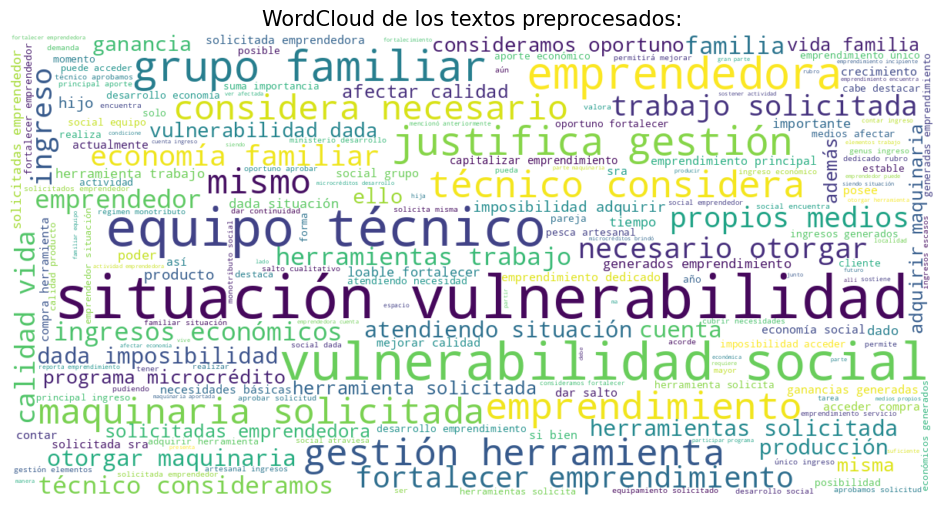

In [84]:
# Para visualizar los datos preprocesados, genero un WordCloud:

# Unir todos los textos preprocesados en un solo string
texto_completo = " ".join(csv_df["Texto_Preprocesado"].values)

# Crear el objeto WordCloud
wordcloud = WordCloud(width=1200, height=600, background_color="white").generate(
    texto_completo
)

# Mostrar la imagen del WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud de los textos preprocesados:", fontsize=15)
plt.show()

### **Insight de la Nube de Palabras**
La nube de palabras destaca las palabras más frecuentes en las evaluaciones preprocesadas, lo que nos permite identificar los términos clave utilizados por el equipo técnico. Algunos hallazgos importantes son:

1. **Términos Recurrentes:**
   - Palabras como **"vulnerabilidad"**, **"situación"**, y **"familiar"** son prominentes, lo que sugiere que la evaluación de las condiciones sociales y económicas de los emprendedores es un factor clave en las decisiones de aprobación.
   - Términos como **"emprendimiento"**, **"equipo técnico"** y **"necesario"** indican la relevancia de la actividad emprendedora y el análisis técnico en las evaluaciones.

2. **Foco en la Ayuda:**
   - Palabras como **"herramienta"**, **"maquinaria"**, y **"solicitada"** reflejan que gran parte del análisis se centra en las necesidades de equipamiento para mejorar las condiciones de los emprendimientos.

3. **Condición Social:**
   - La presencia destacada de términos como **"propios medios"**, **"economía"**, y **"social"** resalta que los evaluadores consideran la imposibilidad de los emprendedores de adquirir recursos por sus propios medios como un criterio clave.

**Conclusión:** La nube de palabras confirma que el texto preprocesado captura términos que reflejan las prioridades del equipo técnico: vulnerabilidad social, apoyo técnico, y equipamiento. Este análisis inicial refuerza la importancia de incluir estos textos en el modelo predictivo, ya que aportan información relevante para la clasificación.

**El siguiente paso es convertir texto a representaciones numéricas** 🧮✨

Los modelos de Machine Learning no pueden procesar texto directamente, ya que trabajan con datos numéricos. Por eso, utilizamos técnicas como **TF-IDF** (Term Frequency-Inverse Document Frequency) para convertir los textos en vectores numéricos que capturen la relevancia de las palabras en el contexto del corpus. 

🔑 **Beneficios de TF-IDF:**
- Destaca palabras importantes mientras reduce el peso de palabras comunes.
- Proporciona una representación estructurada del texto para el entrenamiento del modelo.

In [85]:
# Crear una lista de stopwords en español
stop_words = stopwords.words("spanish")

# Inicializar el vectorizador TF-IDF con las stopwords en español
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,  # Limitar a las 1000 palabras más relevantes
    ngram_range=(1, 2),  # Considerar unigramas y bigramas
    stop_words=stop_words,  # Usa las stopwords del español cargadas previamente
)

# Ajustar y transformar los textos preprocesados en una matriz TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(csv_df["Texto_Preprocesado"])

# Convertir la matriz TF-IDF en un DataFrame
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out()
)

print(tfidf_df.head())

   abierto  abierto taller   acceder  acceder adquisición  acceder compra  acompañada  acompañada dependencias  acompañamiento  acopiador  acorde  acrecentar  actividad  actividad además  actividad desarrolla  actividad emprendedora  actividad laboral  actividad realiza  actividad recomendó  actividades  actividades laborales  actual  actual emprendedor  actual emprendimiento  actuales  actualmente  actualmente realiza  adelante  además  además desarrollada  además oportunidades  adquirir  adquirir equipamiento  adquirir herramienta  adquirir herramientas  adquirir maquinaria  adquirirla  adquisición  adriana  afectada  afectada calidad   afectar  afectar calidad  afectar economía  afrontan  afrontan situación  afrontar  agilizar  ahorro  ahorros  albañilería  alberto  alcanzar  allí  alquiler  ampliar  anteriormente  anteriormente poseer  antiguedad  antiguedad genus    aporta  aportada  aportada permitirá  aportados   aportar  aporte  aporte economía  aporte económico  aporte grupo  

In [86]:
tfidf_df.describe()

abierto  abierto taller      acceder  acceder adquisición  acceder compra   acompañada  acompañada dependencias  acompañamiento    acopiador       acorde   acrecentar    actividad  actividad además  actividad desarrolla  actividad emprendedora  actividad laboral  actividad realiza  actividad recomendó  actividades  actividades laborales       actual  actual emprendedor  actual emprendimiento     actuales  actualmente  actualmente realiza     adelante       además  además desarrollada  además oportunidades     adquirir  adquirir equipamiento  adquirir herramienta  adquirir herramientas  adquirir maquinaria   adquirirla  adquisición      adriana     afectada  afectada calidad      afectar  afectar calidad  afectar economía     afrontan  afrontan situación     afrontar     agilizar       ahorro      ahorros  albañilería      alberto     alcanzar         allí     alquiler      ampliar  anteriormente  anteriormente poseer   antiguedad  antiguedad genus       aporta     aportada  aportada permitirá    aportados      aportar       aporte  aporte economía  aporte económico  aporte grupo  aporte importante      aportes    aprobamos  aprobamos solicitud      aprobar  aprobar solicitud      apuesta         aquí       arriba    artesanal  artesanal ingresos          así   atendiendo  atendiendo necesidad  atendiendo situación  atravesando    atraviesa  atraviesa emprendimiento   atraviesan     aumentar      avanzar        ayuda       ayudar          año         años          aún         bajo         bien       brinda      brindar     brindará  brindará oportunidad       brindó  brindó información         buen        buena  buena calidad       buscar      básicas     búsqueda         cabe  cabe destacar         cada      calidad  calidad productos  calidad vida     cantidad  cantidad clientes    capacidad  capacidad productiva  capacitación   capacitado      capital  capital trabajo  capitalización  capitalizar  capitalizar emprendimiento  capitalizarse        cargo       carlos         casa         casi         caso       chance  circunscrito  circunscrito gran       ciudad     clientes   climáticas       coloca  coloca emprendedor  coloca emprendedora      colocan  colocan emprendedor  comercialización  complementando  complementar       compra  compra herramienta  compra herramientas  compra maquinaria  compra tipo      comprar  comprar herramienta  comprar herramientas  comprometer  comprometer calidad  comprometer economía   compromiso  condiciones  condiciones vida    condición  condición reclusión  condición vulnerabilidad   confección    considera  considera importante  considera necesario  considera oportuno  considera pertinente  consideración  consideramos  consideramos fortalecer  consideramos necesario  consideramos oportuno  considerando   constancia    constante     contando       contar  contar ingresos     contexto    continuar  continuidad  continuidad emprendimiento  correspondiente        corto        costo       costos  costos modelos    cotidiana   cotidianas    cotidiano       crecer    creciendo  crecimiento      creemos      crédito       cuales  cualitativo  cualitativo cuantitativo  cuantitativo       cuanto       cubrir  cubrir gastos  cubrir necesidades       cuenta  cuenta ingresos  cuenta medios  cuenta recursos  cuenta situación      cuentan     cuestión  cuestión cultural     cultural  cultural zona        curso           da         dada  dada importancia  dada imposibilidad  dada necesidad  dada situación         dado   dado menos  dado variable       daniel          dar  dar continuidad    dar salto         debe      debemos       debido       decide        decir     dedicado  dedicado rubro         deja        dejar      demanda        demás       dentro  dependencia  dependencias  dependencias ministerio       derivó  derivó situación   desarrolla  desarrollada  desarrollada manera  desarrollar  desarrollar emprendimiento   desarrollo  desarrollo actividad  desarrollo economía  desarrollo emprendimiento

### **4️⃣ Entrenamiento del Modelo Predictivo** 🤖✨

🔑 **Pasos a seguir:**
1. Dividir los datos en conjuntos de **entrenamiento** y **prueba** (train/test split).
2. Entrenar un modelo supervisado como **Random Forest** o **Logistic Regression** utilizando las representaciones numéricas como variables explicativas.
3. Evaluar el modelo en base a su capacidad para predecir correctamente las etiquetas (`Aprobado` o `No aprobado`).

💡 **Objetivo:** Construir un modelo que pueda aprender patrones relevantes en los textos de evaluación y utilizar esta información para predecir si un emprendedor será aprobado o no.

In [87]:
# Combinar TF-IDF con la variable objetivo ·Etiqueta·:
X = tfidf_df  # Variables explicativas (representaciones numéricas de texto)
y = csv_df["Etiqueta"].map({"Aprobado": 1, "No aprobado": 0})

# Dividir el dataset en entrenamiento (80%) y prueba (20%):
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Inicializar el modelo Random Forest:
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento:
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba:
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluar el desempeño del modelo:
classification_rep = classification_report(
    y_test, y_pred, target_names=["No aprobado", "Aprobado"]
)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Resultados:
print("Reporte de Clasificación:\n")
print(classification_rep)

print("Matriz de Confusión:\n")
print(conf_matrix)

print(f"ROC AUC Score: {roc_auc:.2f}")

Reporte de Clasificación:

              precision    recall  f1-score   support

 No aprobado       0.89      0.47      0.62        17
    Aprobado       0.96      1.00      0.98       235

    accuracy                           0.96       252
   macro avg       0.93      0.73      0.80       252
weighted avg       0.96      0.96      0.95       252

Matriz de Confusión:

[[  8   9]
 [  1 234]]
ROC AUC Score: 0.94
